# Explore here

## Importamos las librerias necesarias para trabajar en el EDA

In [2]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Traemos las información del ejercicio

In [3]:
medical = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Graficamos los parámetros categóricos para revisar su comportamiento en el set de datos

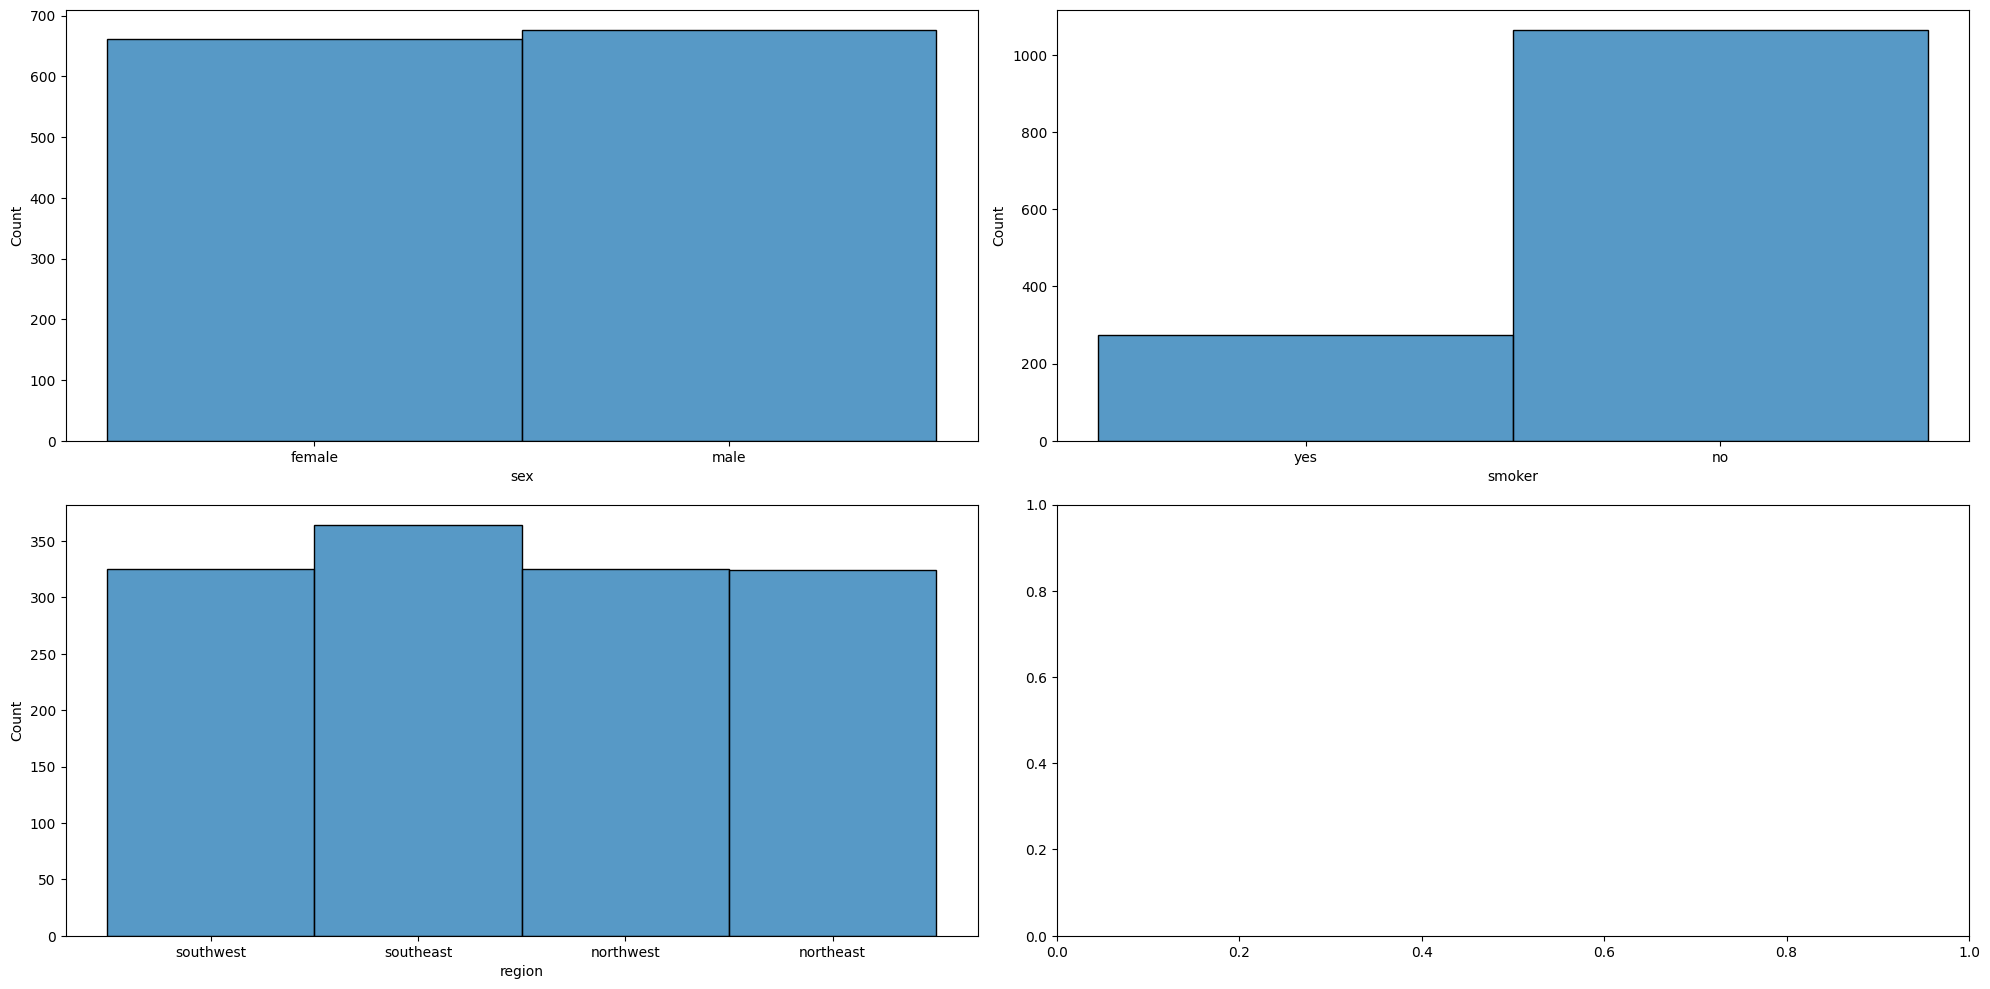

In [4]:
fig, axis = plt.subplots(2, 2, figsize = (20, 10))
sns.histplot (ax = axis [0, 0], data = medical, x = 'sex')
sns.histplot (ax = axis [0, 1], data = medical, x = 'smoker')
sns.histplot (ax = axis [1, 0], data = medical, x = 'region')

plt.tight_layout()

plt.show()

## De mismo modo graficamos los parámetros numéricos para ver su comportamiento.

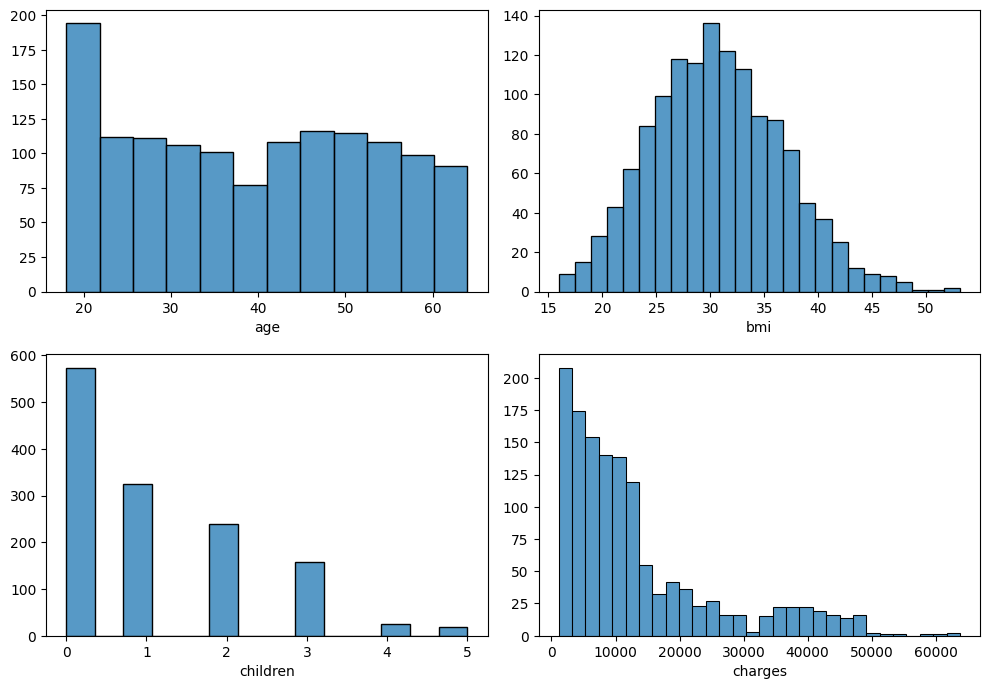

In [5]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = medical, x = "age").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = medical, x = "bmi").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = medical, x = "children").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = medical, x = "charges").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Realizamos un gráfico de correlacion como el mapa de calor (heatmap), primero haciendo la conversion (factorización) de los parámetros categóricos.

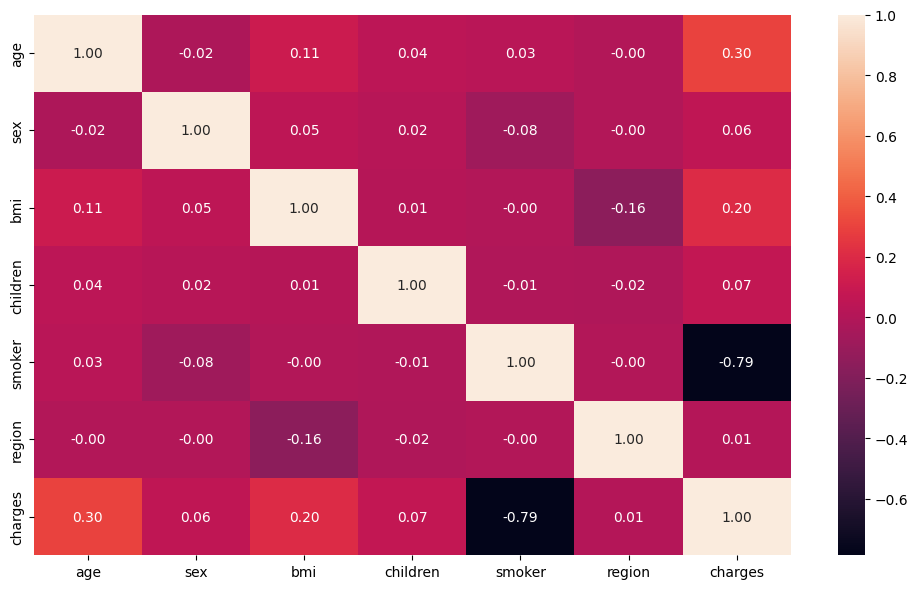

In [6]:
medical["sex"] = pd.factorize(medical["sex"])[0]
medical["smoker"] = pd.factorize(medical["smoker"])[0]
medical["region"] = pd.factorize(medical["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(medical[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()


## el parámetro smoker (categórico) es el que más correlación tiene, y en menor medida age y sex, estos dos últimos, teniendo en cuenta que son númericos se hace una revisión de sus datos para ver si es posible hacer una limpieza para tenerlos en cuenta en la predicción (si bien no tienen una correlación fuerte, no son despreciables como los demas parámetros)

<Axes: xlabel='bmi'>

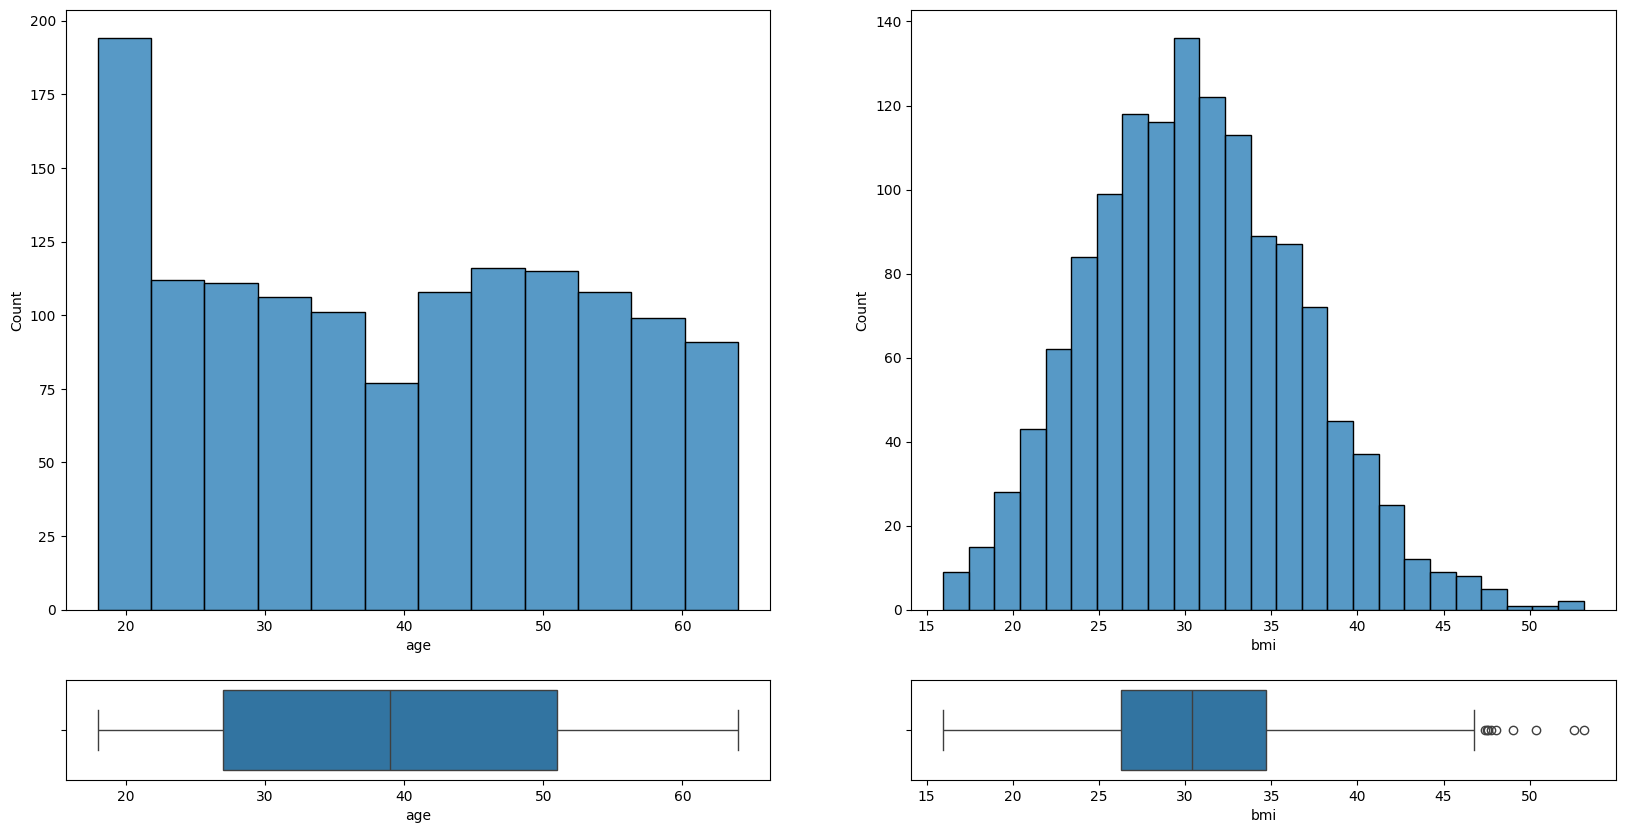

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (20, 10), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot (ax = axis [0, 0], data = medical, x = 'age')
sns.boxplot (ax = axis [1, 0], data = medical, x = 'age')
sns.histplot (ax = axis [0, 1], data = medical, x = 'bmi')
sns.boxplot (ax = axis [1, 1], data = medical, x = 'bmi')

## Se hace una validación para saber que datos son posibles outliers

In [8]:
bmi_stats = medical["bmi"].describe()
bmi_stats
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.29 and 13.7, with an interquartile range of 8.4


## si bien, tenemos unos outliers que pueden eliminarse, no se puede perder de vista, que estos parámetros no tienen la correlación tan fuerte como si lo es smoker, por lo que eliminarlos, podría ser perjudicial porque también se eliminaría la información de smoker, por lo que no se eliminan.

## El paso a seguir es definir X y Y:

In [9]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [11]:
X = medical.drop(["sex", "children", "region", "charges"], axis = 1, inplace = False)
y = medical["charges"]

## Asignamos un 80 - 20 para dividir el set de datos de entrenamiento (train) del de test.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train.head()

,age,bmi,smoker
560,46,19.95,1
1285,47,24.32,1
1142,52,24.86,1
969,39,34.32,1
486,54,21.47,1


In [14]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [15]:
X_test.head()

,age,bmi,smoker
764,45,25.175,1
887,36,30.020,1
890,64,26.885,0
1293,46,25.745,1
259,19,31.920,0


In [16]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

## importamos las librerias para la regresión lógistica

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Realizamos el entrenamiento y el testeo (sacar la precisión del modelo de predicción)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1070 non-null   int64  
 1   bmi     1070 non-null   float64
 2   smoker  1070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


In [19]:
# Crear una instancia del modelo de regresión logística
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)


## Revisamos la precisión del modelo

In [20]:
import numpy as np
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 34512843.88022789
Raíz del Error cuadrático medio: 5874.763304187488
Coeficiente de determinación: 0.7776932310583375


## Si bien tenemos aparentemente un buen coeficiente de determinación, vale la pena explorar una optimización del modelo, pero no se podrá hacer en este ejercicio porque la regresión lineal no permite optimización de hiperparametros.